<a href="https://colab.research.google.com/github/ayushanneya/Machine_learning_lab/blob/main/Lab_10_Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 128  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [ ]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [ ]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
autoencoder.compile(optimizer='RMSprop', loss='binary_crossentropy')

In [ ]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=12,
                batch_size=144,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/12
417/417 [==============================] - 5s 11ms/step - loss: 0.2417 - val_loss: 0.1765
Epoch 2/12
417/417 [==============================] - 5s 12ms/step - loss: 0.1585 - val_loss: 0.1420
Epoch 3/12
417/417 [==============================] - 4s 10ms/step - loss: 0.1333 - val_loss: 0.1232
Epoch 4/12
417/417 [==============================] - 4s 11ms/step - loss: 0.1181 - val_loss: 0.1107
Epoch 5/12
417/417 [==============================] - 5s 13ms/step - loss: 0.1072 - val_loss: 0.1014
Epoch 6/12
417/417 [==============================] - 4s 10ms/step - loss: 0.0995 - val_loss: 0.0951
Epoch 7/12
417/417 [==============================] - 4s 9ms/step - loss: 0.0942 - val_loss: 0.0908
Epoch 8/12
417/417 [==============================] - 5s 13ms/step - loss: 0.0905 - val_loss: 0.0878
Epoch 9/12
417/417 [==============================] - 5s 11ms/step - loss: 0.0878 - val_loss: 0.0854
Epoch 10/12
417/417 [==============================] - 4s 10ms/step - loss: 0.0857 - val_los

In [ ]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 2ms/step


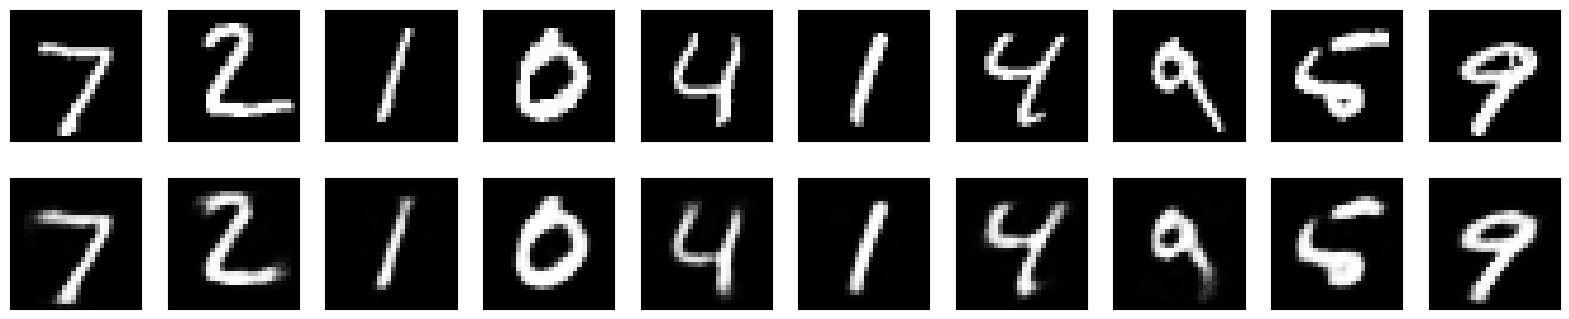

In [ ]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model

# Define the size of the encoded representation
encoding_dim = 256  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# Input placeholder
input_img = Input(shape=(784,))

# Encoding layers
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# Decoding layers
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# Autoencoder model
autoencoder = Model(input_img, decoded)

# Encoder model
encoder = Model(input_img, encoded)

# Decoder model
encoded_input = Input(shape=(encoding_dim,))
decoder_layer1 = autoencoder.layers[-3]
decoder_layer2 = autoencoder.layers[-2]
decoder_layer3 = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer3(decoder_layer2(decoder_layer1(encoded_input))))


In [ ]:
# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
autoencoder.fit(x_train, x_train,
                epochs=12,
                batch_size=1024,
                shuffle=True,
                validation_data=(x_test, x_test))



Epoch 1/12
59/59 [==============================] - 5s 70ms/step - loss: 0.0899 - val_loss: 0.0829
Epoch 2/12
59/59 [==============================] - 3s 49ms/step - loss: 0.0832 - val_loss: 0.0825
Epoch 3/12
59/59 [==============================] - 3s 48ms/step - loss: 0.0831 - val_loss: 0.0825
Epoch 4/12
59/59 [==============================] - 3s 48ms/step - loss: 0.0830 - val_loss: 0.0825
Epoch 5/12
59/59 [==============================] - 4s 77ms/step - loss: 0.0829 - val_loss: 0.0825
Epoch 6/12
59/59 [==============================] - 4s 71ms/step - loss: 0.0828 - val_loss: 0.0822
Epoch 7/12
59/59 [==============================] - 3s 47ms/step - loss: 0.0827 - val_loss: 0.0821
Epoch 8/12
59/59 [==============================] - 3s 47ms/step - loss: 0.0825 - val_loss: 0.0819
Epoch 9/12
59/59 [==============================] - 4s 69ms/step - loss: 0.0825 - val_loss: 0.0821
Epoch 10/12
59/59 [==============================] - 3s 47ms/step - loss: 0.0824 - val_loss: 0.0820
Epoch 11/

In [ ]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 2ms/step


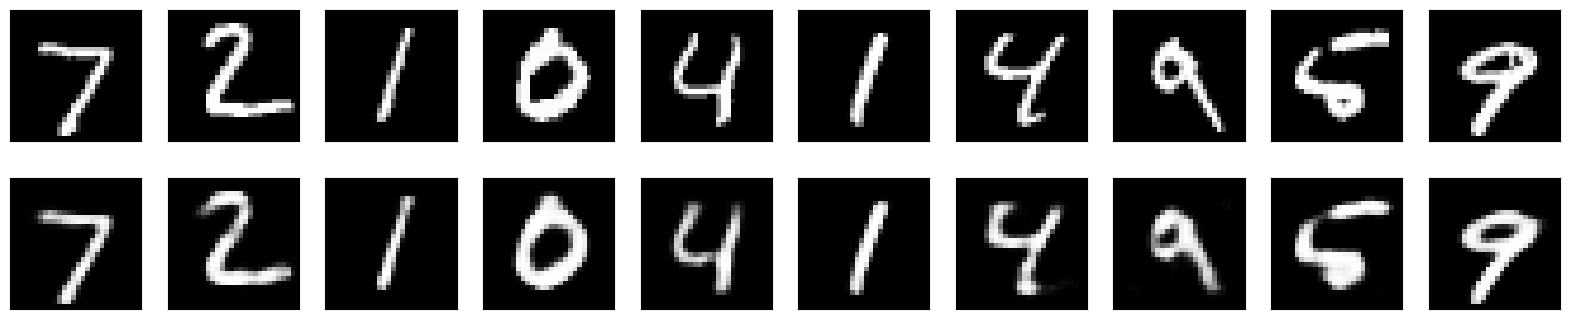

In [ ]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()